# COGS 118A Final Project - Supervised Classification Algoithms 
- ### Datasets From UCI Repository:
    - #### Dataset 1: Breast Cancer Wisconsin (Diagnostic)
        - Features: 32 (Columns)
        - Observations:  569 (Rows) --> (Patients)
        - No missing values
        - Binary Classification (M = malignant, B = benign)  
        - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
    - #### Dataset 2:  Email Spam 
        - Features: 56 
        - Observations:  4601
        - Missing values are filled with zeros by the creators.
        - Binary Classification (0 = Not Spam, 1 = Spam)  
        - https://archive.ics.uci.edu/ml/datasets/Spambase
    - #### Dataset 3: Musk
        - Features: 165
        - Observations:  476
        - No Missing values
        - Binary Classification (0 = Not Musk, 1 = Musk)  
        - https://archive.ics.uci.edu/ml/datasets/Musk+%28Version+1%29

- ### Supervised Classification Learning Algoithms:
    - #### Logistic Regression Classifier
        - Hyperparameters: inverse regularization ( C ).
    - #### Random Forest Classifier 
        - Hyperparameters: number of trees ( n_estimators ).
    - #### K-nearest neighbors Classifier
        - Hyperparameters: number of neighbors near a point ( n_neighbors )
           

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Helper Heatmap Functions For Trainnig and Validation Accuracies:

In [2]:
def draw_heatmap_logistic(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f',cmap='coolwarm', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' For l2 w.r.t C')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [3]:
def draw_heatmap_random_forest(acc, acc_desc, C_list):
    plt.figure(figsize = (2,20))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', cmap='coolwarm', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel=' n_estimators')
    plt.title(acc_desc + ' w.r.t n_estimators')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [4]:
def draw_heatmap_knn(acc, acc_desc, k):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f',cmap='coolwarm', yticklabels=k, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' For knn w.r.t n_neighbors')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

## For Dataset 1:

### Importing Dataset 

In [5]:
df_ds_One = pd.read_csv('wdbc - wdbc.csv')
df_ds_One= df_ds_One.rename(columns={x:y for x,y in zip(df_ds_One.columns,range(0,len(df_ds_One.columns)))})

In [6]:
target = df_ds_One[1]
df_ds_One = df_ds_One.drop([1], axis=1)
features = df_ds_One

### Classifier 1: Logistic Regression (Binary Classification)

#### Helper fuction that does CV, computes train, validation accuracy, finds optimal hyperparameter, computers test accuracy

In [7]:
test_avg = []

def LR(features_train, features_test, target_train, target_test):
    # 3 Trials
    for i in range(1,4):
        logistic = LogisticRegression()
        C_list = np.logspace(-8, 4, num=10)
        # Create dictionary hyperparameter candidates
        # hyperparameters = {'penalty':('l1', 'l2'),'C':C_list}
        hyperparameters = {'C':C_list}

        # Create grid search
        gridsearch = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0, return_train_score=True)

        # Fit grid search
        best_model = gridsearch.fit(features_train, target_train)
    
        print('------ Trial#' + str(i) + ' ------')
        train_acc = (best_model.cv_results_['mean_train_score']).reshape(-1,1)
        draw_heatmap_logistic(train_acc, 'train accuracy', np.logspace(-8, 4, num=10))

        val_acc = (best_model.cv_results_['mean_test_score']).reshape(-1,1)
        draw_heatmap_logistic(val_acc, 'val accuracy', np.logspace(-8, 4, num=10))
    
        print('Best C: '+ str(best_model.best_estimator_.get_params()['C']))
    
        #logistic = LogisticRegression(penalty=best_model.best_estimator_.get_params()['penalty'],C=best_model.best_estimator_.get_params()['C'])
        logistic = LogisticRegression(C=best_model.best_estimator_.get_params()['C'])

        logistic = logistic.fit(features_train, target_train)
        test_avg.append(logistic.score(features_test,target_test))
    
        print('Test Accuracy: '+ str(logistic.score(features_test,target_test)))
    
        target_predicted = logistic.predict(features_test)
        class_names = logistic.classes_
        class_names =['0','1']

        print('')

        # Create a classification report
        print('Classification Report:')
        print(classification_report(target_test, target_predicted, target_names=class_names))
        #classification_report(target_test, target_predicted)

    
        print('\n')
        
    print('Average Test Accuracy: ' + str(sum(test_avg)/3.0))
    test_avg.clear()

#### Spliting DataFrame into Training and Testing Sets --> 20% Training Set , 80% Testing Set. (20/80)

In [8]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.80, random_state=1)

------ Trial#1 ------


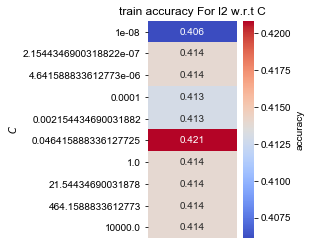

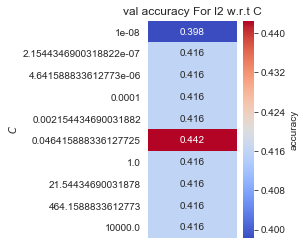

Best C: 0.046415888336127725
Test Accuracy: 0.37280701754385964

Classification Report:
             precision    recall  f1-score   support

          0       0.80      0.01      0.03       289
          1       0.37      0.99      0.54       167

avg / total       0.64      0.37      0.21       456



------ Trial#2 ------


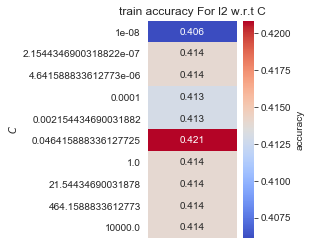

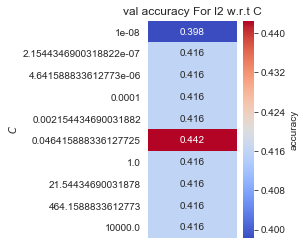

Best C: 0.046415888336127725
Test Accuracy: 0.37280701754385964

Classification Report:
             precision    recall  f1-score   support

          0       0.80      0.01      0.03       289
          1       0.37      0.99      0.54       167

avg / total       0.64      0.37      0.21       456



------ Trial#3 ------


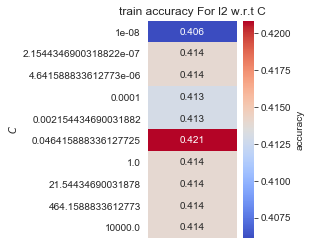

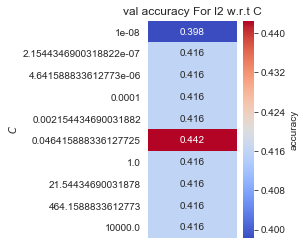

Best C: 0.046415888336127725
Test Accuracy: 0.37280701754385964

Classification Report:
             precision    recall  f1-score   support

          0       0.80      0.01      0.03       289
          1       0.37      0.99      0.54       167

avg / total       0.64      0.37      0.21       456



Average Test Accuracy: 0.37280701754385964


In [9]:
LR(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets  --> 50% Training Set , 50% Testing Set. (50/50)

In [10]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.50, random_state=1)

------ Trial#1 ------


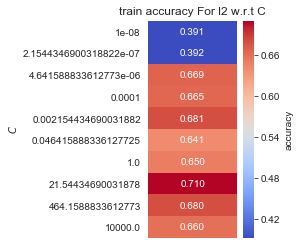

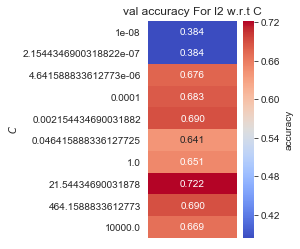

Best C: 21.54434690031878
Test Accuracy: 0.8842105263157894

Classification Report:
             precision    recall  f1-score   support

          0       0.87      0.96      0.91       182
          1       0.92      0.75      0.82       103

avg / total       0.89      0.88      0.88       285



------ Trial#2 ------


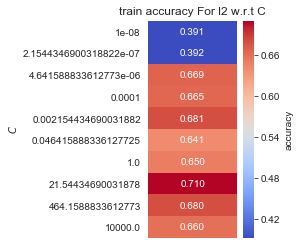

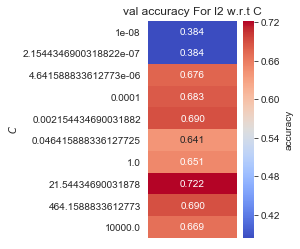

Best C: 21.54434690031878
Test Accuracy: 0.8842105263157894

Classification Report:
             precision    recall  f1-score   support

          0       0.87      0.96      0.91       182
          1       0.92      0.75      0.82       103

avg / total       0.89      0.88      0.88       285



------ Trial#3 ------


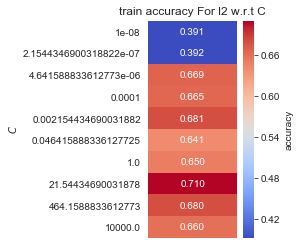

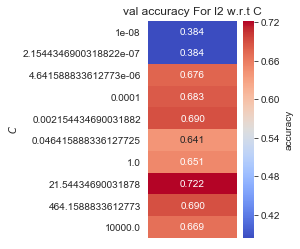

Best C: 21.54434690031878
Test Accuracy: 0.8842105263157894

Classification Report:
             precision    recall  f1-score   support

          0       0.87      0.96      0.91       182
          1       0.92      0.75      0.82       103

avg / total       0.89      0.88      0.88       285



Average Test Accuracy: 0.8842105263157894


In [11]:
LR(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets  --> 80% Training Set , 20% Testing Set. (80/20)

In [12]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

------ Trial#1 ------


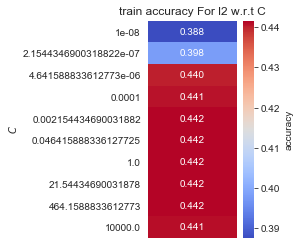

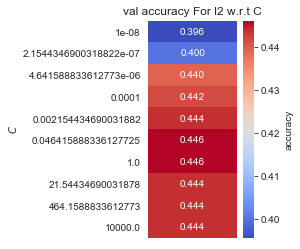

Best C: 0.046415888336127725
Test Accuracy: 0.3684210526315789

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        72
          1       0.37      1.00      0.54        42

avg / total       0.14      0.37      0.20       114





/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


------ Trial#2 ------


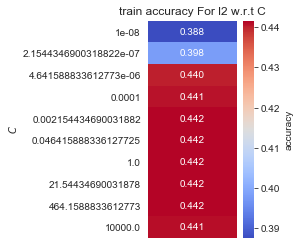

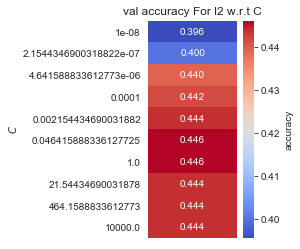

Best C: 0.046415888336127725
Test Accuracy: 0.3684210526315789

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        72
          1       0.37      1.00      0.54        42

avg / total       0.14      0.37      0.20       114





/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


------ Trial#3 ------


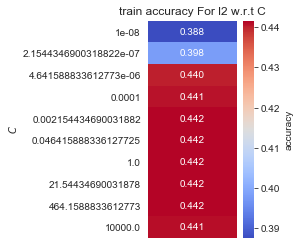

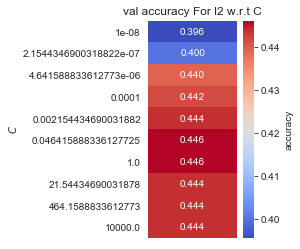

Best C: 0.046415888336127725
Test Accuracy: 0.3684210526315789

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        72
          1       0.37      1.00      0.54        42

avg / total       0.14      0.37      0.20       114



Average Test Accuracy: 0.3684210526315789


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
LR(features_train, features_test, target_train, target_test)

### Classifier 2: Random Forest (Binary Classification)
#### Helper fuction that does CV, computes train, validation accuracy, finds optimal hyperparameter, computers test accuracy

In [14]:
test_avg = []
def RF(features_train, features_test, target_train, target_test):
    # 3 Trials
    for i in range(1,4):
        random_forest = RandomForestClassifier()

        hyperparameters = {'n_estimators':np.arange(1, 50, 1)}

        # Create grid search
        gridsearch = GridSearchCV(random_forest, hyperparameters, cv=10, verbose=0, return_train_score=True)

        # Fit grid search
        best_model = gridsearch.fit(features_train, target_train)
    
        print('------ Trial#' + str(i) + ' ------')
    
        train_acc = (best_model.cv_results_['mean_train_score']).reshape(-1,1)
        draw_heatmap_random_forest(train_acc, 'train accuracy', np.arange(1, 50, 1))
    
        val_acc = (best_model.cv_results_['mean_test_score']).reshape(-1,1)
        draw_heatmap_random_forest(val_acc, 'val accuracy', np.arange(1, 50, 1))

        print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
        random_forest = RandomForestClassifier(n_estimators= best_model.best_estimator_.get_params()['n_estimators'])
        random_forest = random_forest.fit(features_train, target_train)
        print('Test Accuracy: ' + str(random_forest.score(features_test,target_test)))
        test_avg.append(random_forest.score(features_test,target_test))
    
        # Train model and make predictions
        target_predicted = random_forest.predict(features_test)
        #class_names = random_forest.classes_
        class_names = ['0','1']
        print('')
        # Create a classification report
        print('Classification Report:')
        # Create a classification report
        print(classification_report(target_test, target_predicted, target_names=class_names))
        print('\n')
        
    print('Average Test Accuracy: ' + str(sum(test_avg)/3.0))
    test_avg.clear()

#### Spliting DataFrame into Training and Testing Sets --> 20% Training Set , 80% Testing Set. (20/80)

In [15]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.80, random_state=1)

------ Trial#1 ------


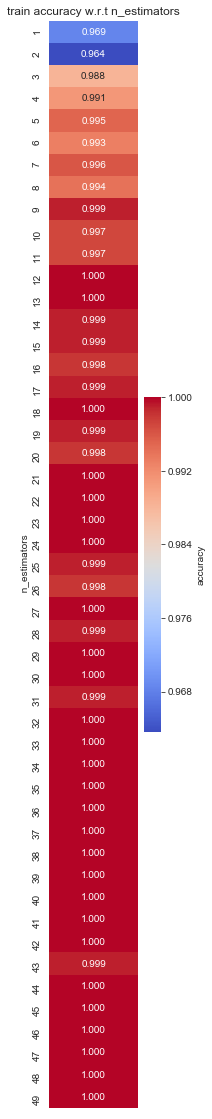

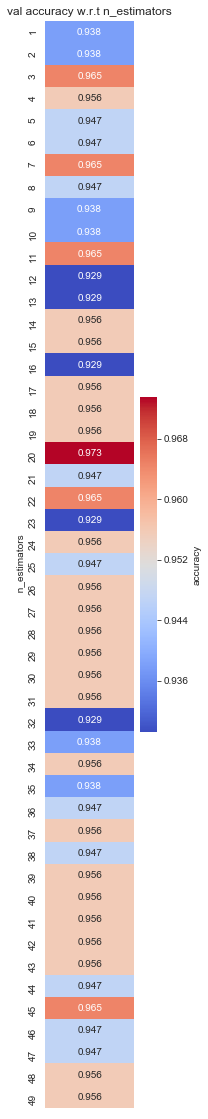

Best n_estimators: 20
Test Accuracy: 0.9276315789473685

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.92      0.94       289
          1       0.88      0.93      0.90       167

avg / total       0.93      0.93      0.93       456



------ Trial#2 ------


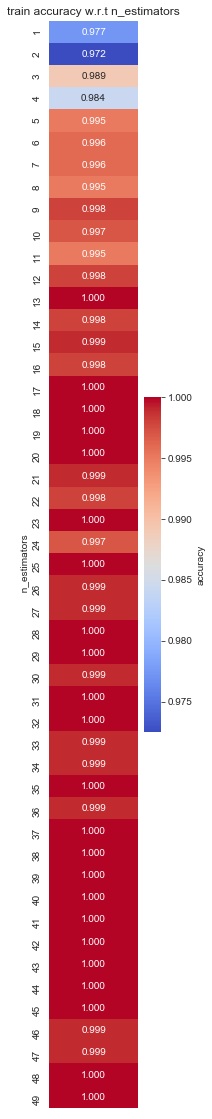

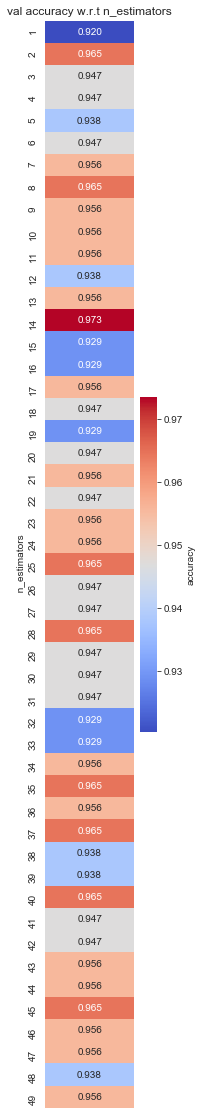

Best n_estimators: 14
Test Accuracy: 0.9166666666666666

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.91      0.93       289
          1       0.86      0.92      0.89       167

avg / total       0.92      0.92      0.92       456



------ Trial#3 ------


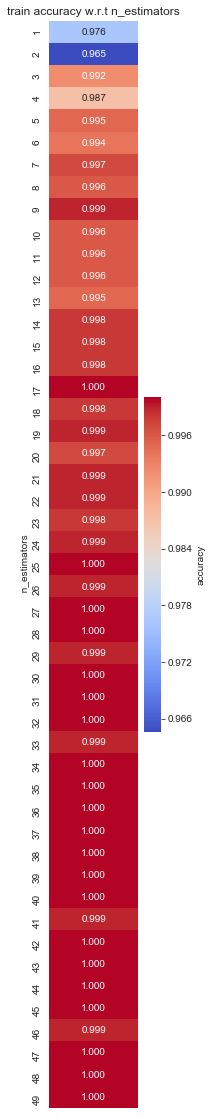

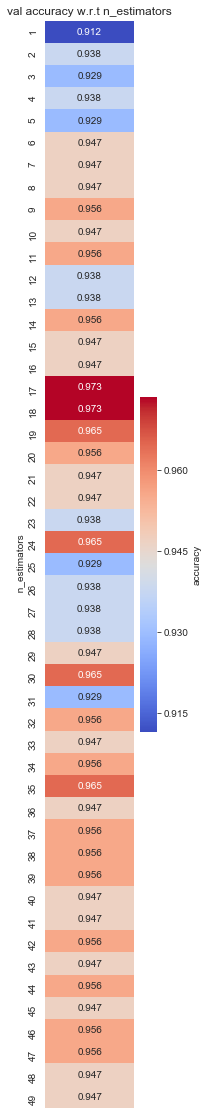

Best n_estimators: 17
Test Accuracy: 0.9407894736842105

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.94      0.95       289
          1       0.90      0.94      0.92       167

avg / total       0.94      0.94      0.94       456



Average Test Accuracy: 0.9283625730994153


In [16]:
RF(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets --> 50% Training Set , 50% Testing Set. (50/50)

In [17]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.50, random_state=1)

------ Trial#1 ------


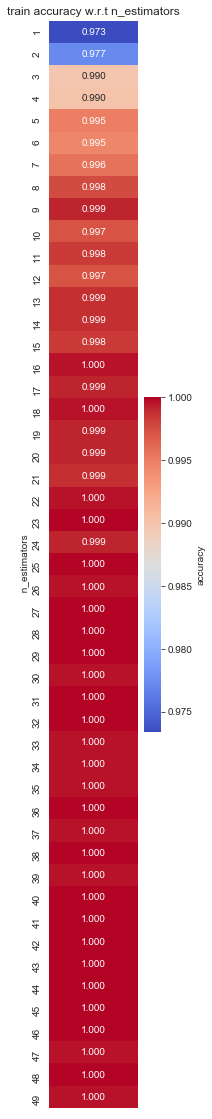

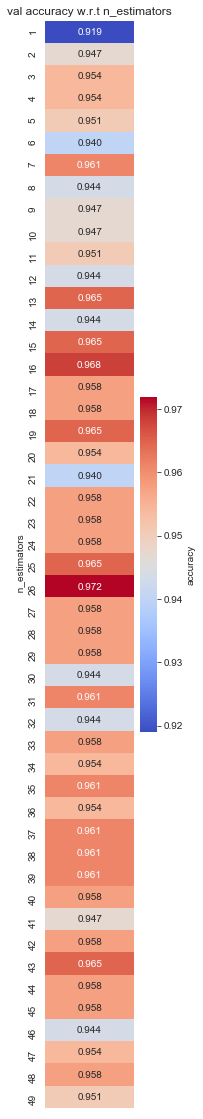

Best n_estimators: 26
Test Accuracy: 0.9543859649122807

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       182
          1       0.96      0.91      0.94       103

avg / total       0.95      0.95      0.95       285



------ Trial#2 ------


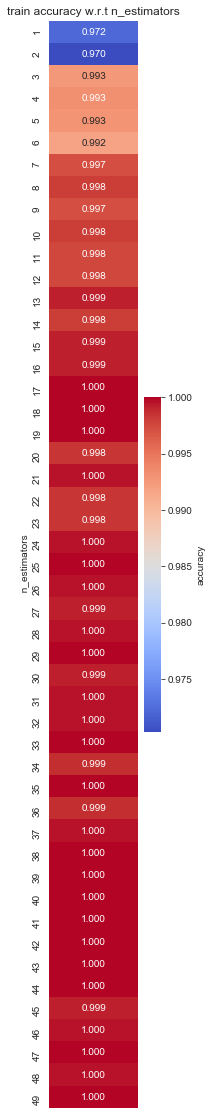

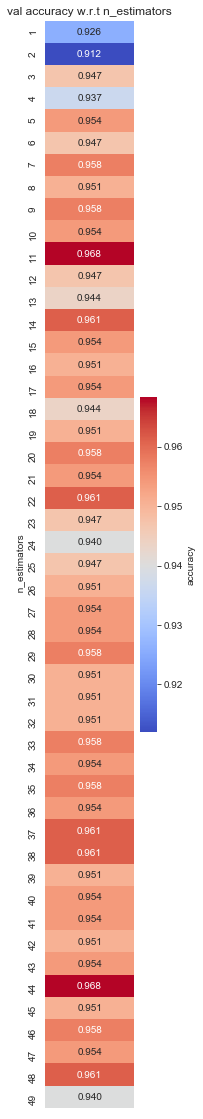

Best n_estimators: 11
Test Accuracy: 0.9157894736842105

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.95      0.93       182
          1       0.90      0.86      0.88       103

avg / total       0.92      0.92      0.92       285



------ Trial#3 ------


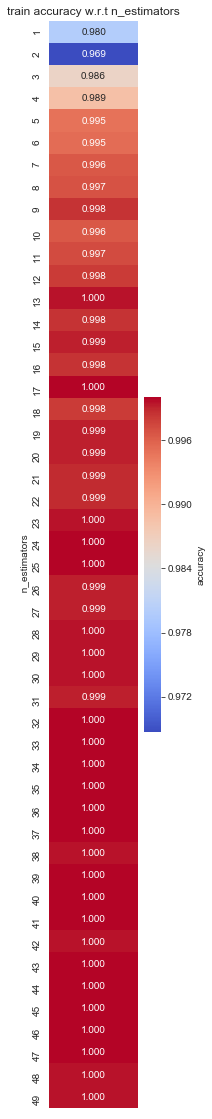

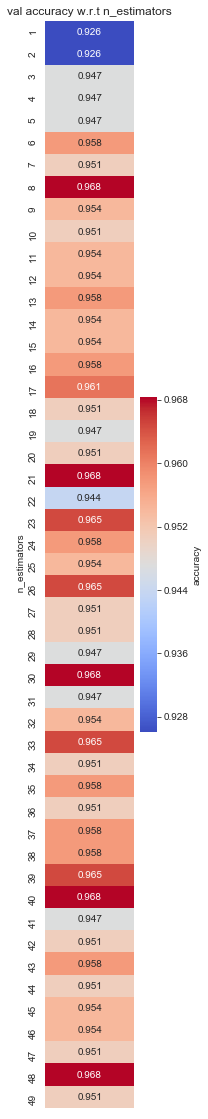

Best n_estimators: 8
Test Accuracy: 0.9438596491228071

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.97      0.96       182
          1       0.95      0.89      0.92       103

avg / total       0.94      0.94      0.94       285



Average Test Accuracy: 0.9380116959064327


In [18]:
RF(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets  --> 80% Training Set , 20% Testing Set. (80/20)

In [19]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

------ Trial#1 ------


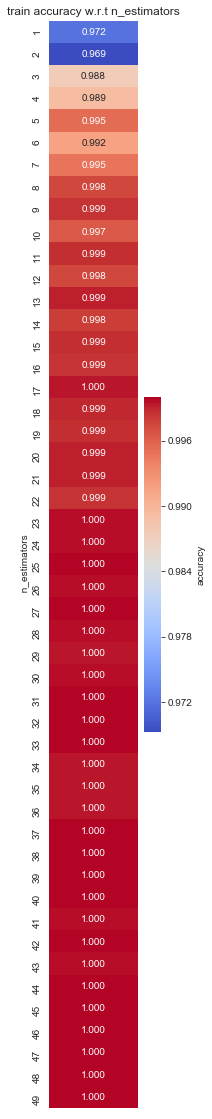

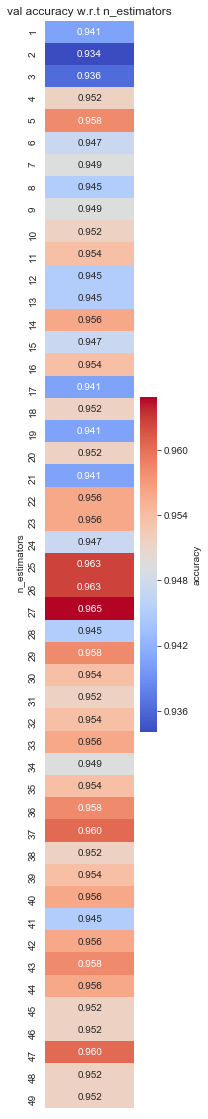

Best n_estimators: 27
Test Accuracy: 0.9473684210526315

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.99      0.96        72
          1       0.97      0.88      0.93        42

avg / total       0.95      0.95      0.95       114



------ Trial#2 ------


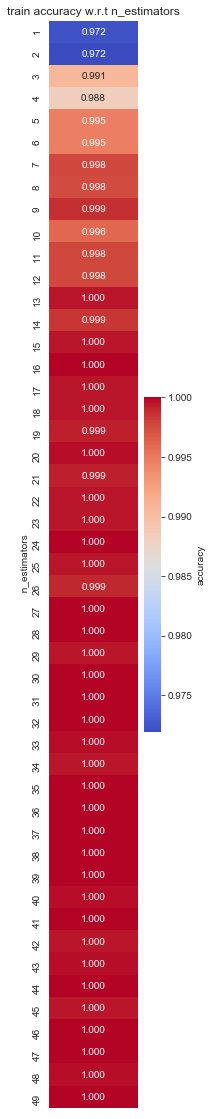

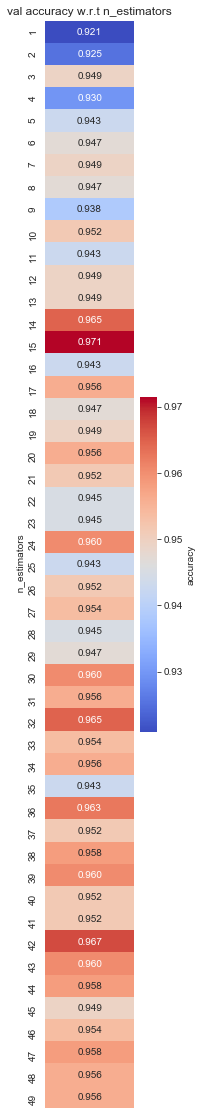

Best n_estimators: 15
Test Accuracy: 0.9649122807017544

Classification Report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97        72
          1       1.00      0.90      0.95        42

avg / total       0.97      0.96      0.96       114



------ Trial#3 ------


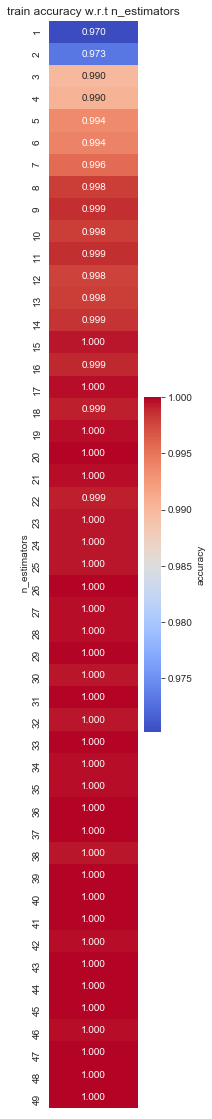

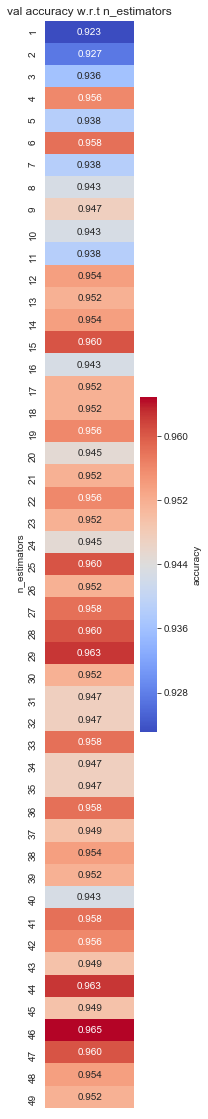

Best n_estimators: 46
Test Accuracy: 0.956140350877193

Classification Report:
             precision    recall  f1-score   support

          0       0.94      1.00      0.97        72
          1       1.00      0.88      0.94        42

avg / total       0.96      0.96      0.96       114



Average Test Accuracy: 0.956140350877193


In [20]:
RF(features_train, features_test, target_train, target_test)

### Classifier 3: K-Nearest Neighbors (Binary Classification)
#### Helper fuction that does CV, computes train, validation accuracy, finds optimal hyperparameter, computers test accuracy

In [21]:
test_avg = []
def knn(features_train, features_test, target_train, target_test):
    #Z-scoring data
    features_train = (features_train - features_train.mean())/(features_train.std())
    features_test = (features_test - features_test.mean())/(features_test.std())
    
    for i in range(1,4):
        hyperparameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
        knn = KNeighborsClassifier()
        # Create grid search
        gridsearch = GridSearchCV(knn, hyperparameters, cv=10, verbose=0, return_train_score=True)
        # Fit grid search
        best_model = gridsearch.fit(features_train, target_train)
              
        print('------ Trial#' + str(i) + ' ------')
    
        train_acc = (best_model.cv_results_['mean_train_score']).reshape(-1,1)
        draw_heatmap_knn(train_acc, 'train accuracy', [1,2,3,4,5,6,7,8,9,10])
    
        val_acc = (best_model.cv_results_['mean_test_score']).reshape(-1,1)
        draw_heatmap_knn(val_acc, 'val accuracy', [1,2,3,4,5,6,7,8,9,10])

        print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
        
        knn = KNeighborsClassifier(n_neighbors= best_model.best_estimator_.get_params()['n_neighbors'])
        knn = knn.fit(features_train, target_train)
        test_avg.append(knn.score(features_test,target_test))
        print('Test Accuracy : ' + str(knn.score(features_test,target_test)))
    
        # Train model and make predictions
        target_predicted = knn.predict(features_test)
        #class_names = knn.classes_
        class_names = ['0','1']

        print('')
        # Create a classification report
        print('Classification Report:')
        # Create a classification report
        print(classification_report(target_test, target_predicted, target_names=class_names))
        print('\n')
        
    print('Average Test Accuracy: ' + str(sum(test_avg)/3.0))
    test_avg.clear()

#### Spliting DataFrame into Training and Testing Sets --> 20% Training Set , 80% Testing Set. (20/80)

In [22]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.80, random_state=1)

------ Trial#1 ------


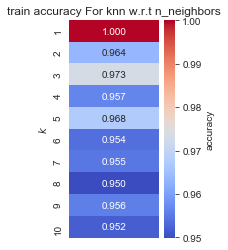

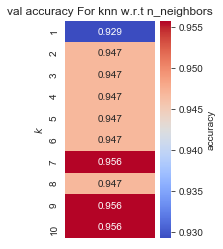

Best n_neighbors: 7
Test Accuracy : 0.9495614035087719

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       289
          1       0.95      0.91      0.93       167

avg / total       0.95      0.95      0.95       456



------ Trial#2 ------


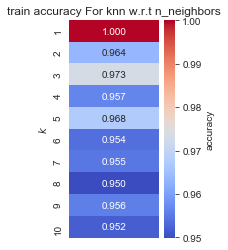

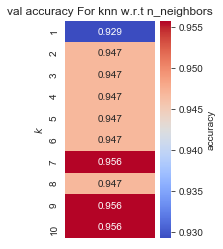

Best n_neighbors: 7
Test Accuracy : 0.9495614035087719

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       289
          1       0.95      0.91      0.93       167

avg / total       0.95      0.95      0.95       456



------ Trial#3 ------


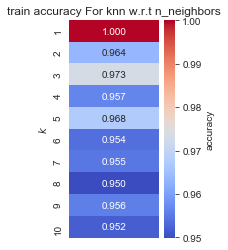

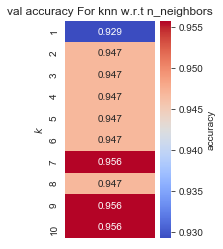

Best n_neighbors: 7
Test Accuracy : 0.9495614035087719

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       289
          1       0.95      0.91      0.93       167

avg / total       0.95      0.95      0.95       456



Average Test Accuracy: 0.9495614035087719


In [23]:
knn(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets  --> 50% Training Set , 50% Testing Set. (50/50)

In [24]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.50, random_state=1)

------ Trial#1 ------


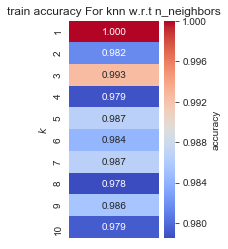

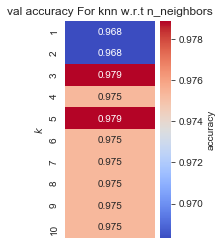

Best n_neighbors: 3
Test Accuracy : 0.9333333333333333

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       182
          1       0.90      0.91      0.91       103

avg / total       0.93      0.93      0.93       285



------ Trial#2 ------


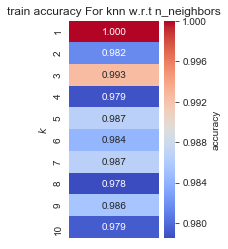

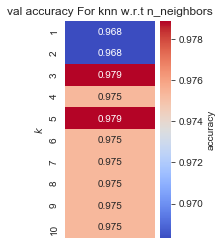

Best n_neighbors: 3
Test Accuracy : 0.9333333333333333

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       182
          1       0.90      0.91      0.91       103

avg / total       0.93      0.93      0.93       285



------ Trial#3 ------


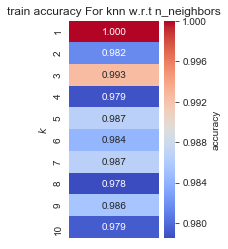

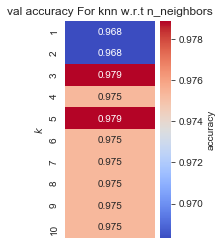

Best n_neighbors: 3
Test Accuracy : 0.9333333333333333

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       182
          1       0.90      0.91      0.91       103

avg / total       0.93      0.93      0.93       285



Average Test Accuracy: 0.9333333333333332


In [25]:
knn(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets  --> 80% Training Set , 20% Testing Set. (80/20)

In [26]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

------ Trial#1 ------


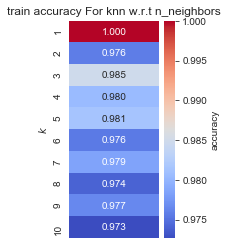

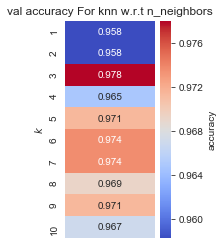

Best n_neighbors: 3
Test Accuracy : 0.9473684210526315

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.97      0.96        72
          1       0.95      0.90      0.93        42

avg / total       0.95      0.95      0.95       114



------ Trial#2 ------


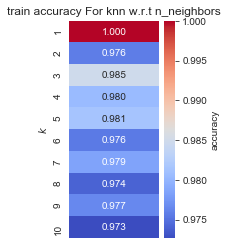

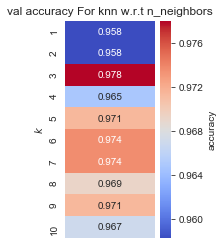

Best n_neighbors: 3
Test Accuracy : 0.9473684210526315

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.97      0.96        72
          1       0.95      0.90      0.93        42

avg / total       0.95      0.95      0.95       114



------ Trial#3 ------


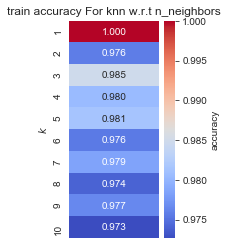

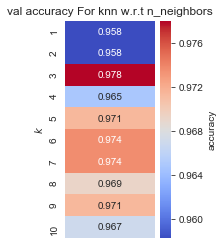

Best n_neighbors: 3
Test Accuracy : 0.9473684210526315

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.97      0.96        72
          1       0.95      0.90      0.93        42

avg / total       0.95      0.95      0.95       114



Average Test Accuracy: 0.9473684210526315


In [27]:
knn(features_train, features_test, target_train, target_test)

## For Dataset 2:

### Importing Dataset 

In [28]:
df_ds_two = pd.read_csv('spambase - spambase.csv')
df_ds_two= df_ds_two.rename(columns={x:y for x,y in zip(df_ds_two.columns,range(0,len(df_ds_two.columns)))})

In [29]:
target = df_ds_two[57]
df_ds_two = df_ds_two.drop([57], axis=1)
features = df_ds_two

### Classifier 1: Logistic Regression
#### Spliting DataFrame into Training and Testing Sets --> 20% Training Set , 80% Testing Set. (20/80)

In [30]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.80, random_state=1)

------ Trial#1 ------


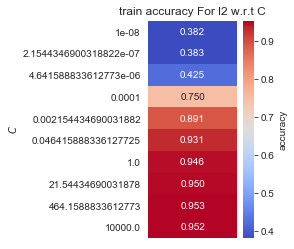

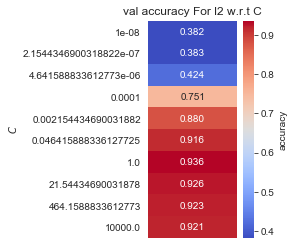

Best C: 1.0
Test Accuracy: 0.9185004074979625

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      2219
          1       0.92      0.87      0.89      1462

avg / total       0.92      0.92      0.92      3681



------ Trial#2 ------


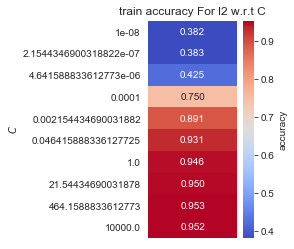

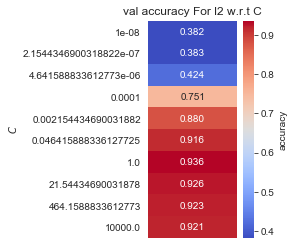

Best C: 1.0
Test Accuracy: 0.9185004074979625

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      2219
          1       0.92      0.87      0.89      1462

avg / total       0.92      0.92      0.92      3681



------ Trial#3 ------


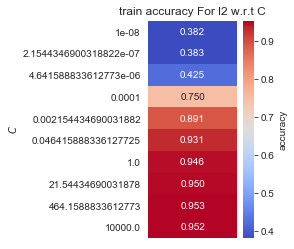

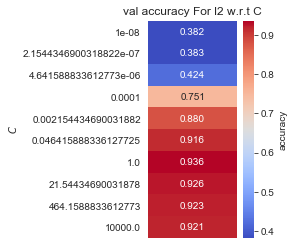

Best C: 1.0
Test Accuracy: 0.9185004074979625

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      2219
          1       0.92      0.87      0.89      1462

avg / total       0.92      0.92      0.92      3681



Average Test Accuracy: 0.9185004074979625


In [31]:
LR(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets  --> 50% Training Set , 50% Testing Set. (50/50)

In [32]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.50, random_state=1)

------ Trial#1 ------


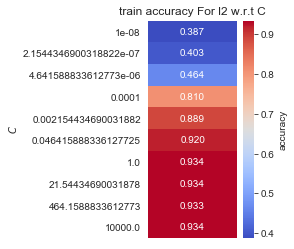

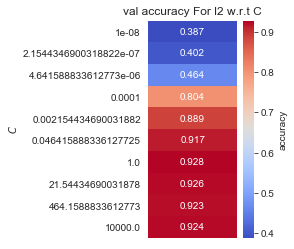

Best C: 1.0
Test Accuracy: 0.9222077357670578

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.95      0.94      1378
          1       0.93      0.88      0.90       923

avg / total       0.92      0.92      0.92      2301



------ Trial#2 ------


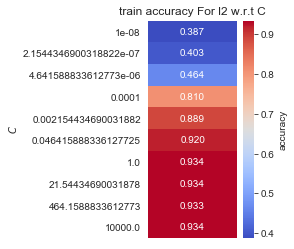

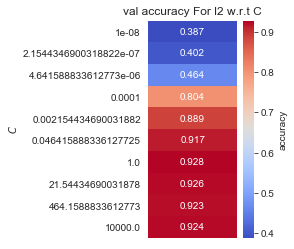

Best C: 1.0
Test Accuracy: 0.9222077357670578

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.95      0.94      1378
          1       0.93      0.88      0.90       923

avg / total       0.92      0.92      0.92      2301



------ Trial#3 ------


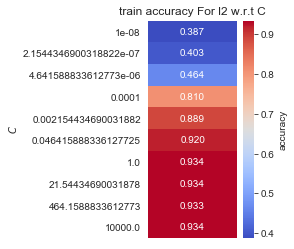

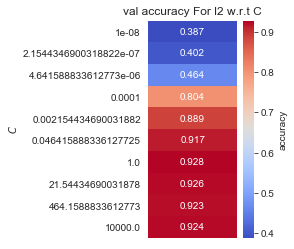

Best C: 1.0
Test Accuracy: 0.9222077357670578

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.95      0.94      1378
          1       0.93      0.88      0.90       923

avg / total       0.92      0.92      0.92      2301



Average Test Accuracy: 0.9222077357670578


In [33]:
LR(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets --> 80% Training Set , 20% Testing Set. (80/20)

In [34]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

------ Trial#1 ------


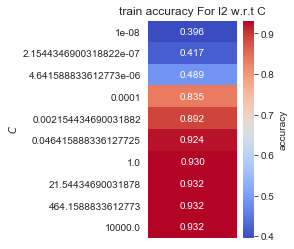

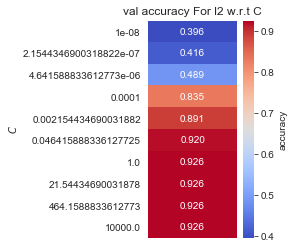

Best C: 10000.0
Test Accuracy: 0.9305103148751357

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.96      0.94       564
          1       0.93      0.89      0.91       357

avg / total       0.93      0.93      0.93       921



------ Trial#2 ------


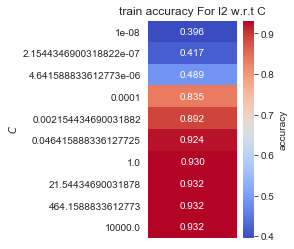

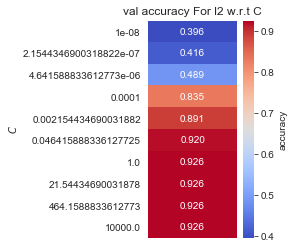

Best C: 10000.0
Test Accuracy: 0.9305103148751357

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.96      0.94       564
          1       0.93      0.89      0.91       357

avg / total       0.93      0.93      0.93       921



------ Trial#3 ------


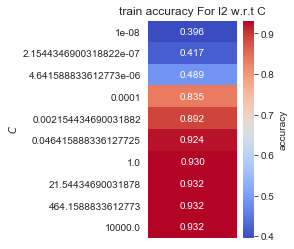

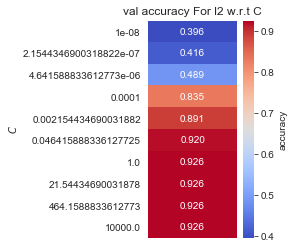

Best C: 10000.0
Test Accuracy: 0.9305103148751357

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.96      0.94       564
          1       0.93      0.89      0.91       357

avg / total       0.93      0.93      0.93       921



Average Test Accuracy: 0.9305103148751357


In [35]:
LR(features_train, features_test, target_train, target_test)

### Classifier 2:  Random Forest Classifier 
#### Spliting DataFrame into Training and Testing Sets --> 20% Training Set , 80% Testing Set. (20/80)

In [36]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.80, random_state=1)

------ Trial#1 ------


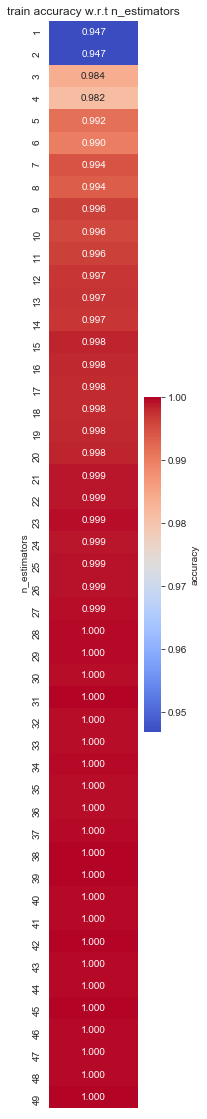

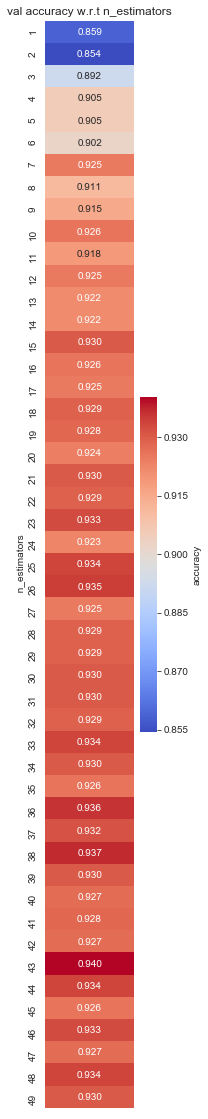

Best n_estimators: 43
Test Accuracy: 0.9364303178484108

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      2219
          1       0.95      0.89      0.92      1462

avg / total       0.94      0.94      0.94      3681



------ Trial#2 ------


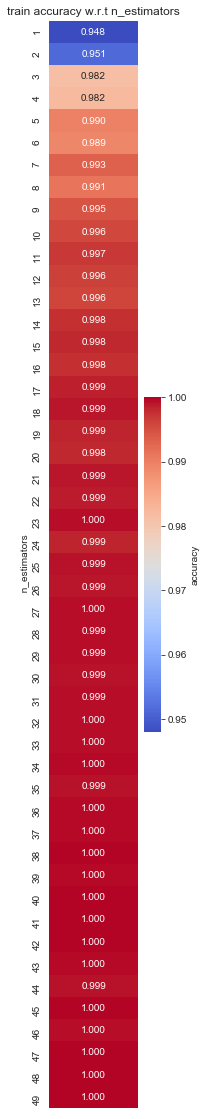

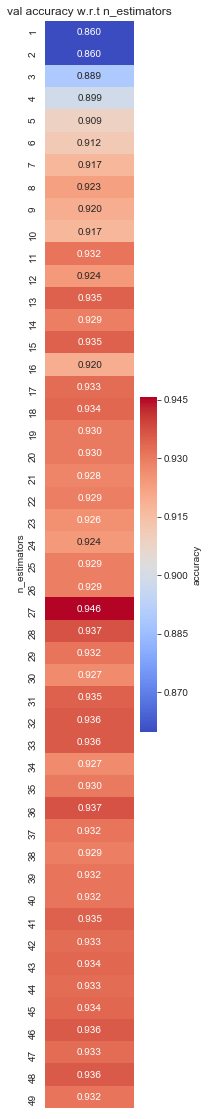

Best n_estimators: 27
Test Accuracy: 0.9345286606900299

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      2219
          1       0.94      0.89      0.92      1462

avg / total       0.93      0.93      0.93      3681



------ Trial#3 ------


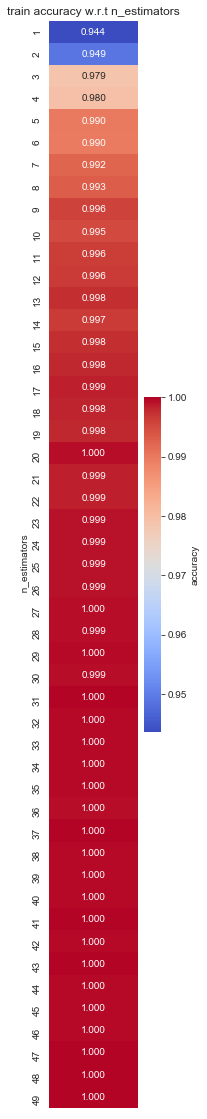

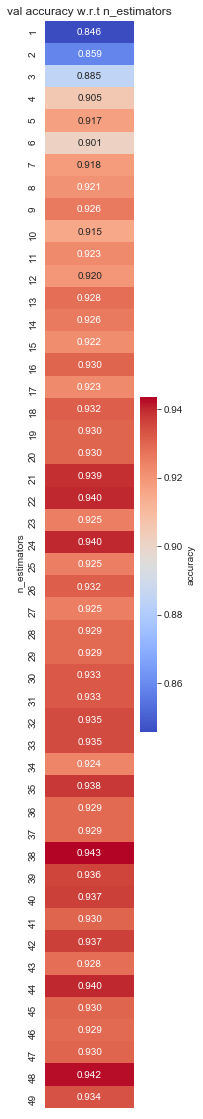

Best n_estimators: 38
Test Accuracy: 0.9309970116816083

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      2219
          1       0.95      0.88      0.91      1462

avg / total       0.93      0.93      0.93      3681



Average Test Accuracy: 0.9339853300733497


In [37]:
RF(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets --> 50% Training Set , 50% Testing Set. (50/50)

In [38]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.50, random_state=1)

------ Trial#1 ------


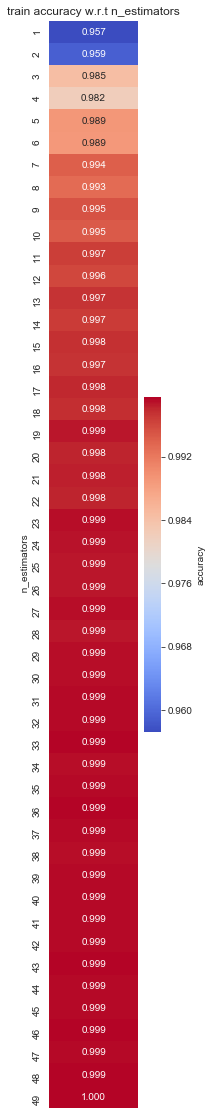

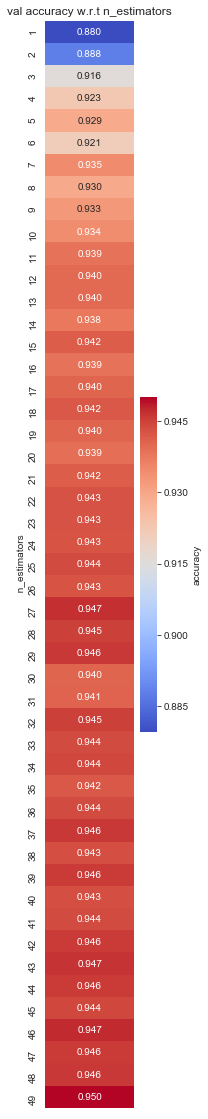

Best n_estimators: 49
Test Accuracy: 0.9426336375488917

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1378
          1       0.95      0.91      0.93       923

avg / total       0.94      0.94      0.94      2301



------ Trial#2 ------


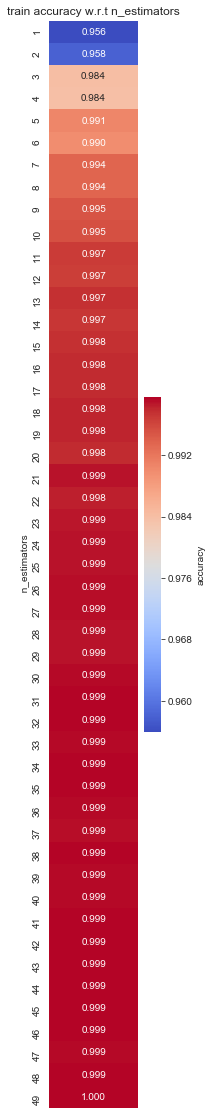

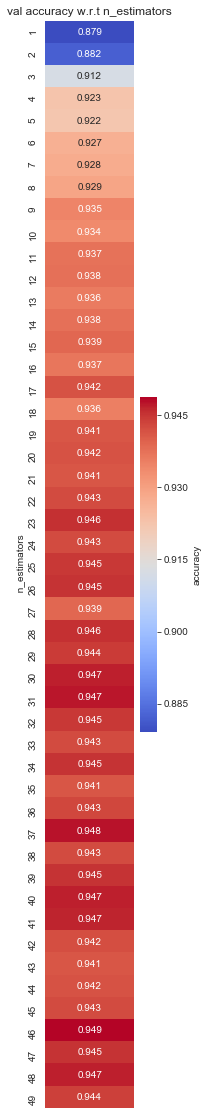

Best n_estimators: 46
Test Accuracy: 0.9408952629291613

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1378
          1       0.94      0.91      0.93       923

avg / total       0.94      0.94      0.94      2301



------ Trial#3 ------


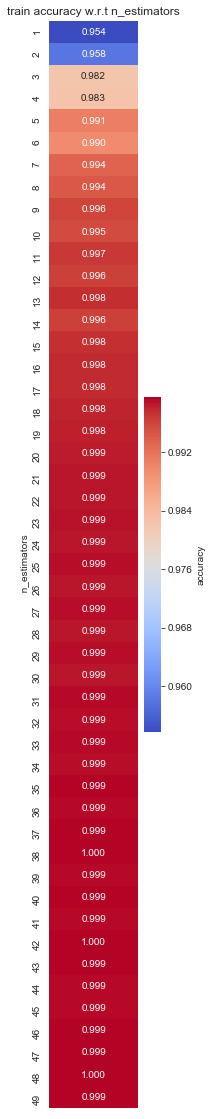

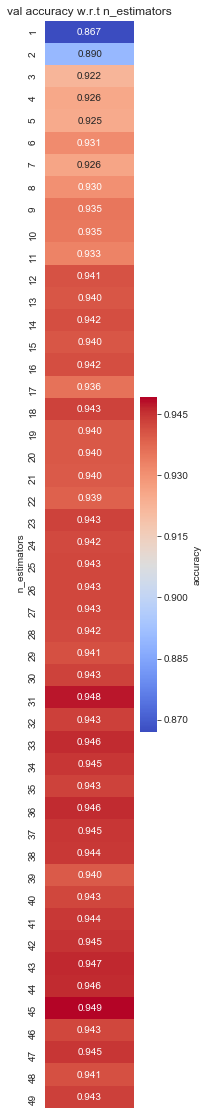

Best n_estimators: 45
Test Accuracy: 0.9430682312038244

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1378
          1       0.95      0.90      0.93       923

avg / total       0.94      0.94      0.94      2301



Average Test Accuracy: 0.9421990438939591


In [39]:
RF(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets --> 80% Training Set , 20% Testing Set. (80/20)

In [40]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

------ Trial#1 ------


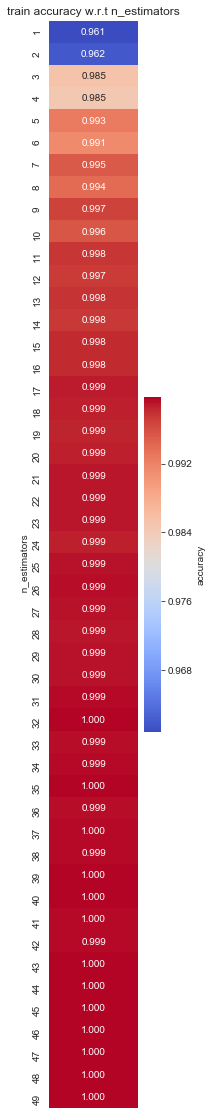

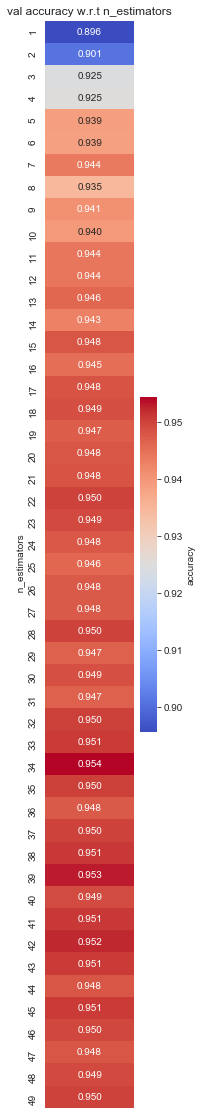

Best n_estimators: 34
Test Accuracy: 0.9587404994571118

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       564
          1       0.97      0.92      0.95       357

avg / total       0.96      0.96      0.96       921



------ Trial#2 ------


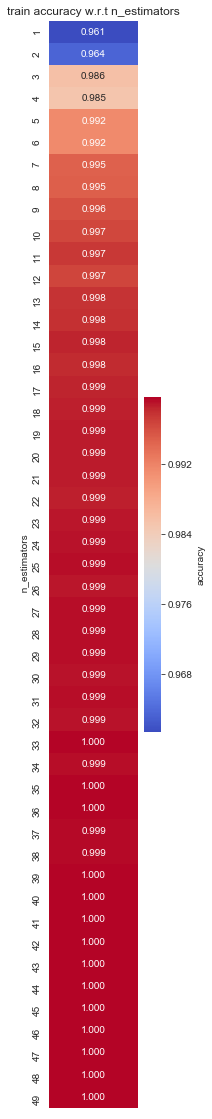

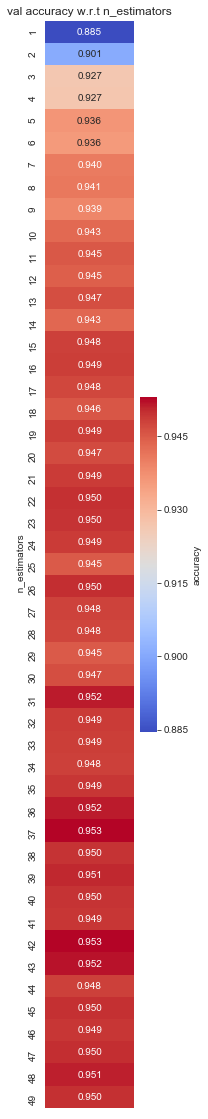

Best n_estimators: 37
Test Accuracy: 0.9576547231270358

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       564
          1       0.96      0.93      0.94       357

avg / total       0.96      0.96      0.96       921



------ Trial#3 ------


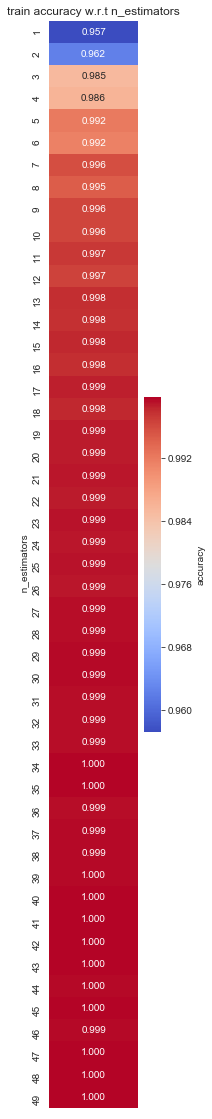

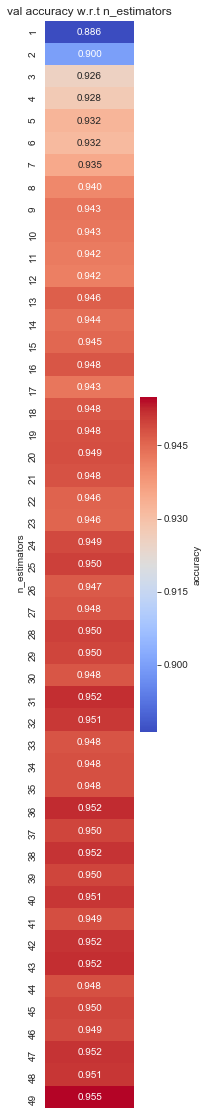

Best n_estimators: 49
Test Accuracy: 0.9554831704668838

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       564
          1       0.96      0.92      0.94       357

avg / total       0.96      0.96      0.96       921



Average Test Accuracy: 0.9572927976836771


In [41]:
RF(features_train, features_test, target_train, target_test)

### Classifier 3:  K-nearest neighbors
#### Spliting DataFrame into Training and Testing Sets --> 20% Training Set , 80% Testing Set. (20/80)

In [42]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.80, random_state=1)

------ Trial#1 ------


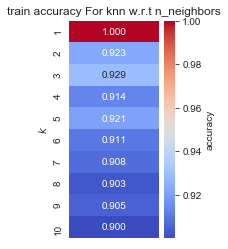

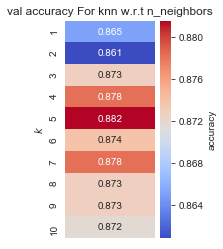

Best n_neighbors: 5
Test Accuracy : 0.8878022276555284

Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.95      0.91      2219
          1       0.91      0.80      0.85      1462

avg / total       0.89      0.89      0.89      3681



------ Trial#2 ------


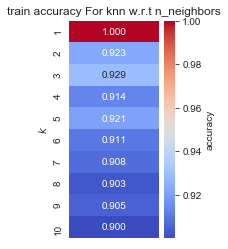

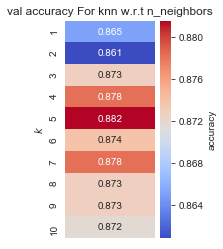

Best n_neighbors: 5
Test Accuracy : 0.8878022276555284

Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.95      0.91      2219
          1       0.91      0.80      0.85      1462

avg / total       0.89      0.89      0.89      3681



------ Trial#3 ------


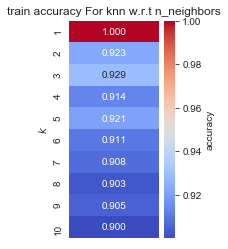

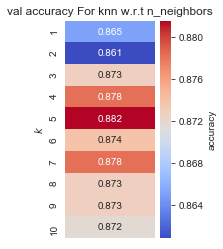

Best n_neighbors: 5
Test Accuracy : 0.8878022276555284

Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.95      0.91      2219
          1       0.91      0.80      0.85      1462

avg / total       0.89      0.89      0.89      3681



Average Test Accuracy: 0.8878022276555284


In [43]:
knn(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets --> 50% Training Set , 50% Testing Set. (50/50)

In [44]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.50, random_state=1)

------ Trial#1 ------


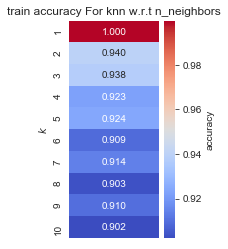

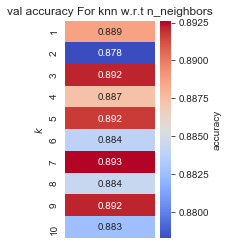

Best n_neighbors: 7
Test Accuracy : 0.9048239895697523

Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.94      0.92      1378
          1       0.91      0.85      0.88       923

avg / total       0.91      0.90      0.90      2301



------ Trial#2 ------


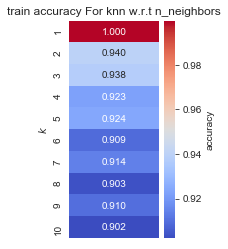

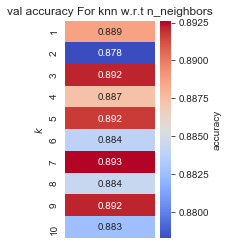

Best n_neighbors: 7
Test Accuracy : 0.9048239895697523

Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.94      0.92      1378
          1       0.91      0.85      0.88       923

avg / total       0.91      0.90      0.90      2301



------ Trial#3 ------


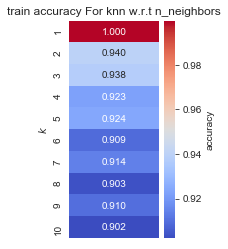

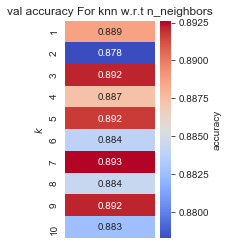

Best n_neighbors: 7
Test Accuracy : 0.9048239895697523

Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.94      0.92      1378
          1       0.91      0.85      0.88       923

avg / total       0.91      0.90      0.90      2301



Average Test Accuracy: 0.9048239895697523


In [45]:
knn(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets --> 80% Training Set , 20% Testing Set. (80/20)

In [46]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

------ Trial#1 ------


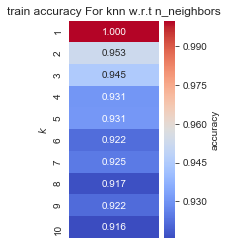

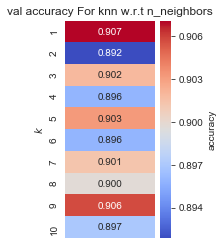

Best n_neighbors: 1
Test Accuracy : 0.9077090119435396

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.92      0.92       564
          1       0.88      0.89      0.88       357

avg / total       0.91      0.91      0.91       921



------ Trial#2 ------


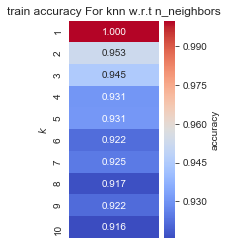

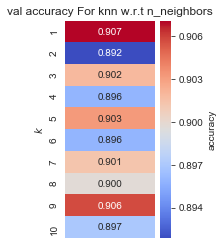

Best n_neighbors: 1
Test Accuracy : 0.9077090119435396

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.92      0.92       564
          1       0.88      0.89      0.88       357

avg / total       0.91      0.91      0.91       921



------ Trial#3 ------


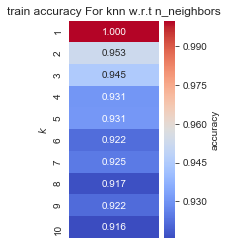

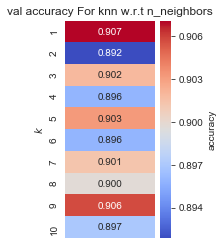

Best n_neighbors: 1
Test Accuracy : 0.9077090119435396

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.92      0.92       564
          1       0.88      0.89      0.88       357

avg / total       0.91      0.91      0.91       921



Average Test Accuracy: 0.9077090119435396


In [47]:
knn(features_train, features_test, target_train, target_test)

## For Dataset 3:

### Importing Dataset 

In [48]:
df_ds_three = pd.read_csv('Musk (Version 1) - clean2.csv')
df_ds_three= df_ds_three.rename(columns={x:y for x,y in zip(df_ds_three.columns,range(0,len(df_ds_three.columns)))})

In [49]:
target = df_ds_three[166]
df_ds_three = df_ds_three.drop([166], axis=1)
features = df_ds_three

### Classifier 1: Logistic Regression
#### Spliting DataFrame into Training and Testing Sets --> 20% Training Set , 80% Testing Set. (20/80)

In [50]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.80, random_state=1)

------ Trial#1 ------


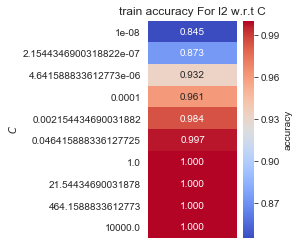

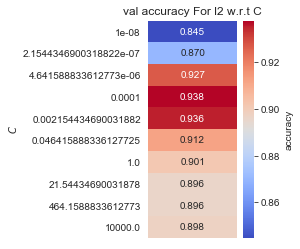

Best C: 0.0001
Test Accuracy: 0.9399507482477742

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.96      4467
          1       0.86      0.73      0.79       812

avg / total       0.94      0.94      0.94      5279



------ Trial#2 ------


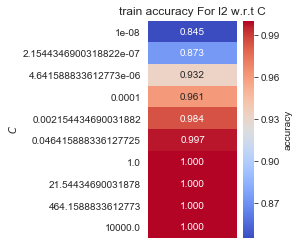

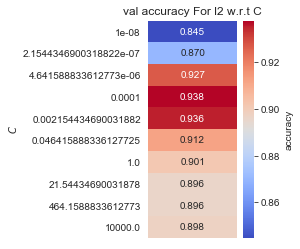

Best C: 0.0001
Test Accuracy: 0.9399507482477742

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.96      4467
          1       0.86      0.73      0.79       812

avg / total       0.94      0.94      0.94      5279



------ Trial#3 ------


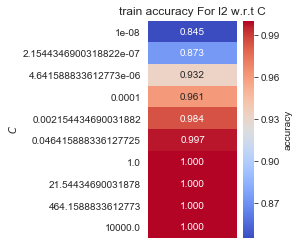

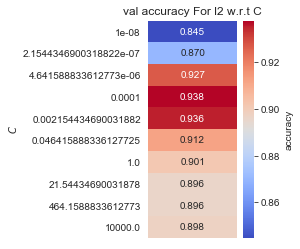

Best C: 0.0001
Test Accuracy: 0.9399507482477742

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.96      4467
          1       0.86      0.73      0.79       812

avg / total       0.94      0.94      0.94      5279



Average Test Accuracy: 0.9399507482477741


In [51]:
LR(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets  --> 50% Training Set , 50% Testing Set. (50/50)

In [52]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.50, random_state=1)

------ Trial#1 ------


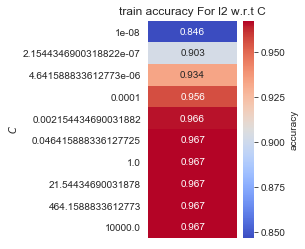

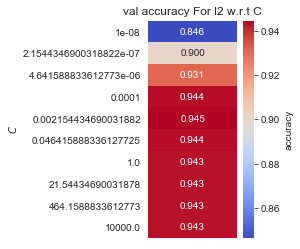

Best C: 0.002154434690031882
Test Accuracy: 0.9515004546832373

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2789
          1       0.87      0.81      0.84       510

avg / total       0.95      0.95      0.95      3299



------ Trial#2 ------


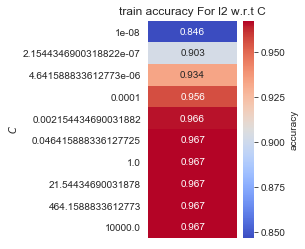

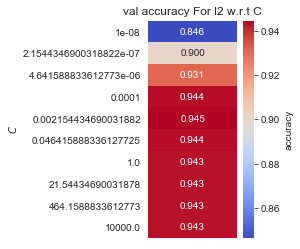

Best C: 0.002154434690031882
Test Accuracy: 0.9515004546832373

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2789
          1       0.87      0.81      0.84       510

avg / total       0.95      0.95      0.95      3299



------ Trial#3 ------


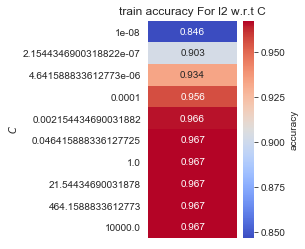

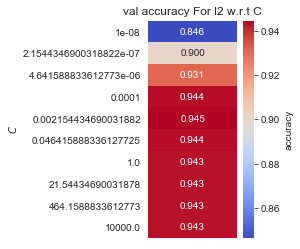

Best C: 0.002154434690031882
Test Accuracy: 0.9515004546832373

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2789
          1       0.87      0.81      0.84       510

avg / total       0.95      0.95      0.95      3299



Average Test Accuracy: 0.9515004546832374


In [53]:
LR(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets --> 80% Training Set , 20% Testing Set. (80/20)

In [54]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

------ Trial#1 ------


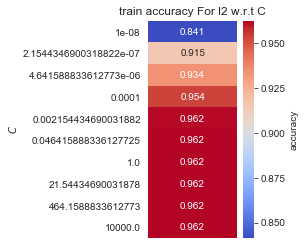

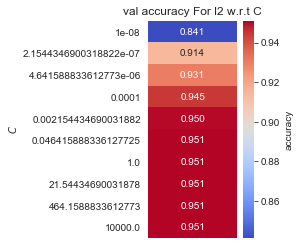

Best C: 0.046415888336127725
Test Accuracy: 0.953030303030303

Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.98      0.97      1141
          1       0.84      0.80      0.82       179

avg / total       0.95      0.95      0.95      1320



------ Trial#2 ------


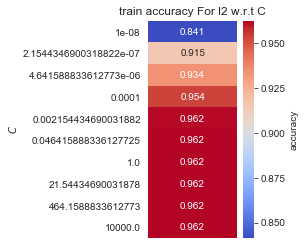

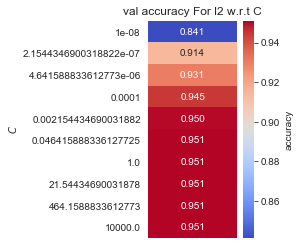

Best C: 0.046415888336127725
Test Accuracy: 0.953030303030303

Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.98      0.97      1141
          1       0.84      0.80      0.82       179

avg / total       0.95      0.95      0.95      1320



------ Trial#3 ------


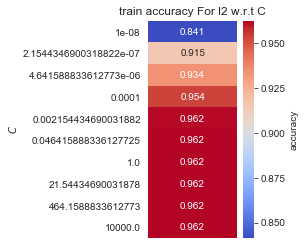

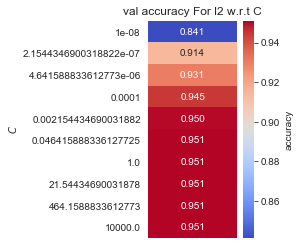

Best C: 0.046415888336127725
Test Accuracy: 0.953030303030303

Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.98      0.97      1141
          1       0.84      0.80      0.82       179

avg / total       0.95      0.95      0.95      1320



Average Test Accuracy: 0.953030303030303


In [55]:
LR(features_train, features_test, target_train, target_test)

### Classifier 2:  Random Forest Classifier 
#### Spliting DataFrame into Training and Testing Sets --> 20% Training Set , 80% Testing Set. (20/80)

In [56]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.80, random_state=1)

------ Trial#1 ------


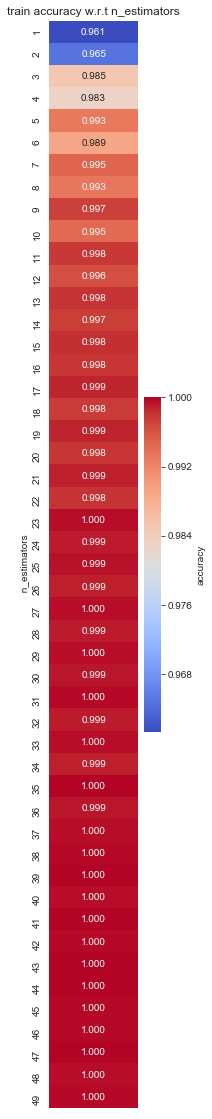

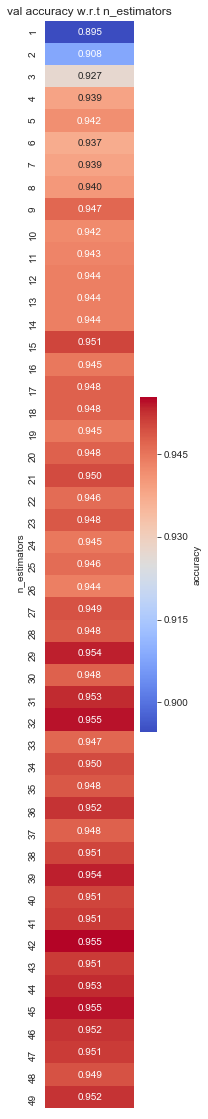

Best n_estimators: 42
Test Accuracy: 0.9410873271452926

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      4467
          1       0.91      0.69      0.78       812

avg / total       0.94      0.94      0.94      5279



------ Trial#2 ------


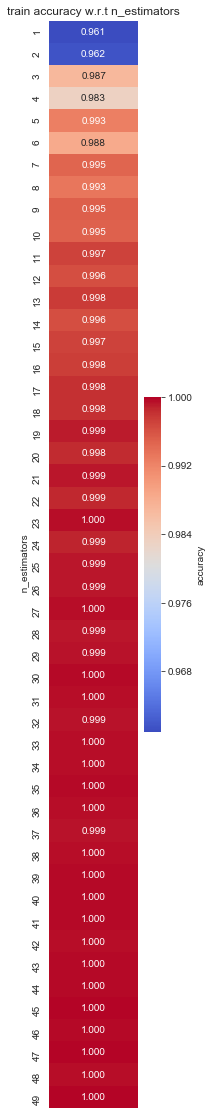

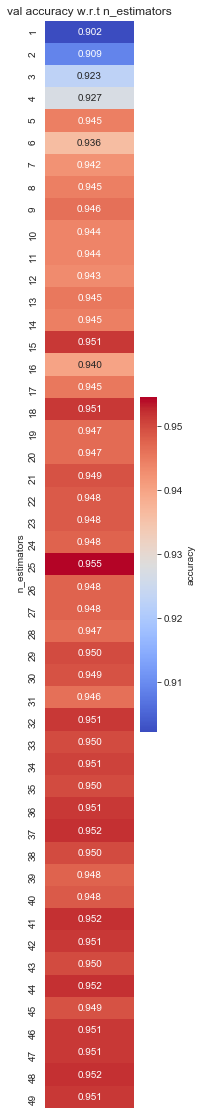

Best n_estimators: 25
Test Accuracy: 0.9471490812653912

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      4467
          1       0.92      0.72      0.81       812

avg / total       0.95      0.95      0.94      5279



------ Trial#3 ------


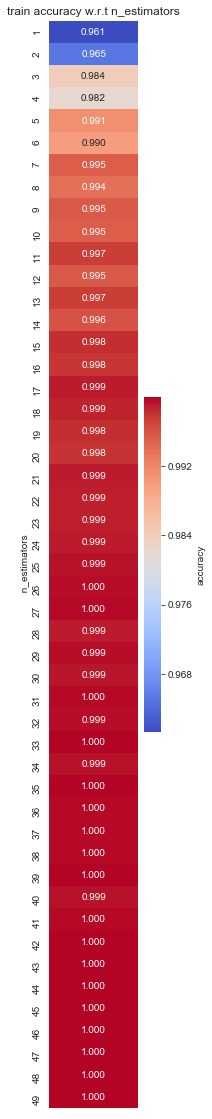

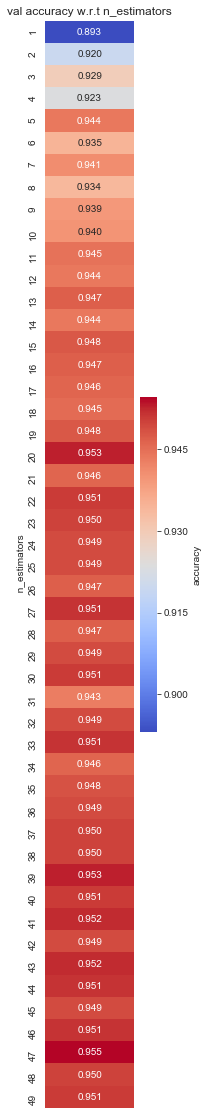

Best n_estimators: 47
Test Accuracy: 0.9450653532866073

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      4467
          1       0.90      0.72      0.80       812

avg / total       0.94      0.95      0.94      5279



Average Test Accuracy: 0.9444339205657638


In [57]:
RF(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets --> 50% Training Set , 50% Testing Set. (50/50)

In [58]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.50, random_state=1)

------ Trial#1 ------


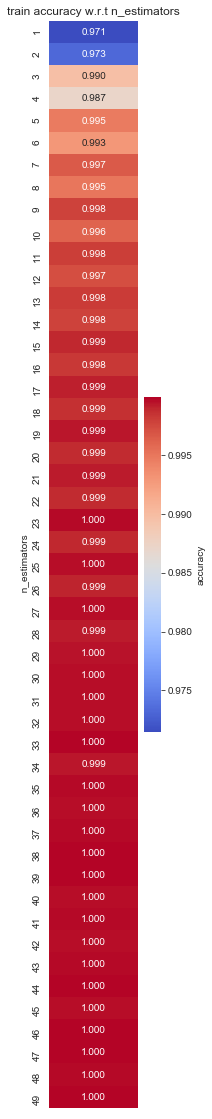

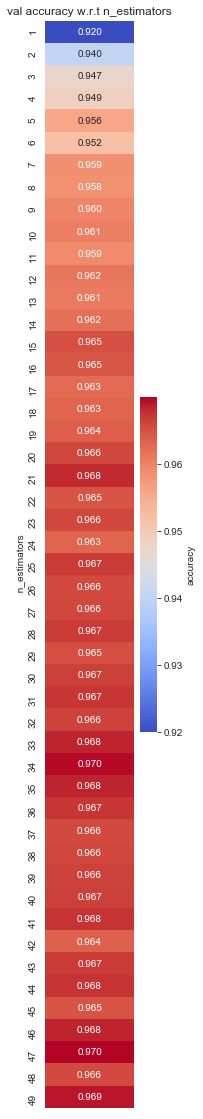

Best n_estimators: 47
Test Accuracy: 0.9699909063352531

Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2789
          1       0.97      0.84      0.90       510

avg / total       0.97      0.97      0.97      3299



------ Trial#2 ------


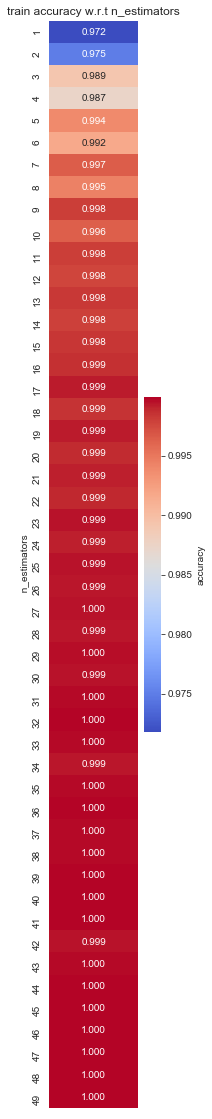

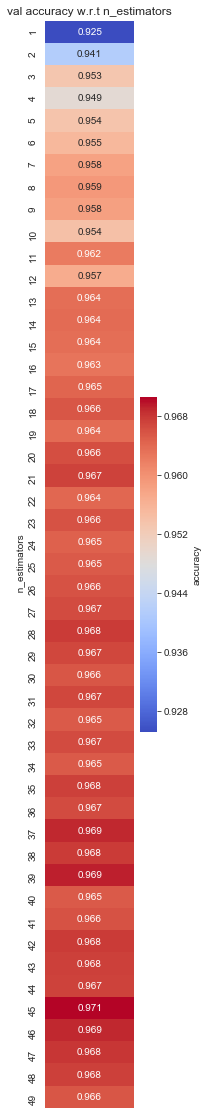

Best n_estimators: 45
Test Accuracy: 0.9684752955441043

Classification Report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2789
          1       0.98      0.82      0.89       510

avg / total       0.97      0.97      0.97      3299



------ Trial#3 ------


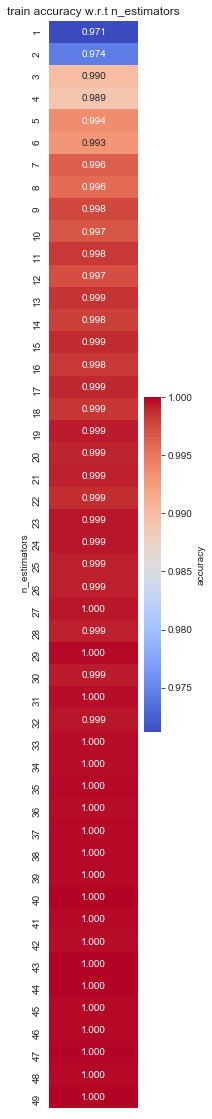

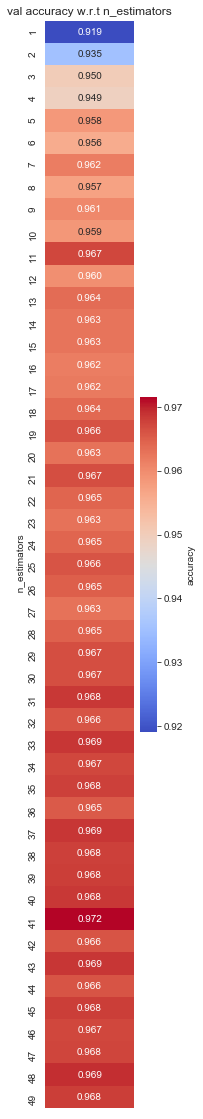

Best n_estimators: 41
Test Accuracy: 0.9687784177023341

Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2789
          1       0.96      0.83      0.89       510

avg / total       0.97      0.97      0.97      3299



Average Test Accuracy: 0.9690815398605638


In [59]:
RF(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets --> 80% Training Set , 20% Testing Set. (80/20)

In [60]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

------ Trial#1 ------


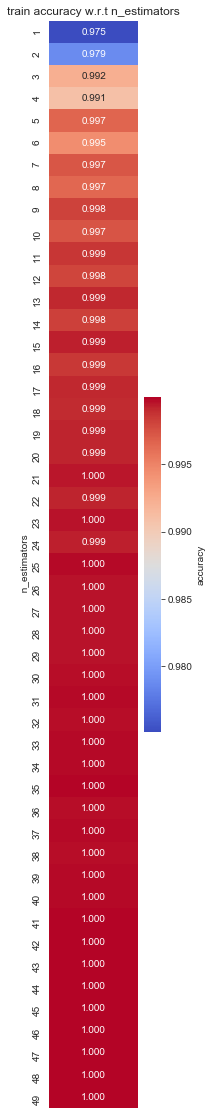

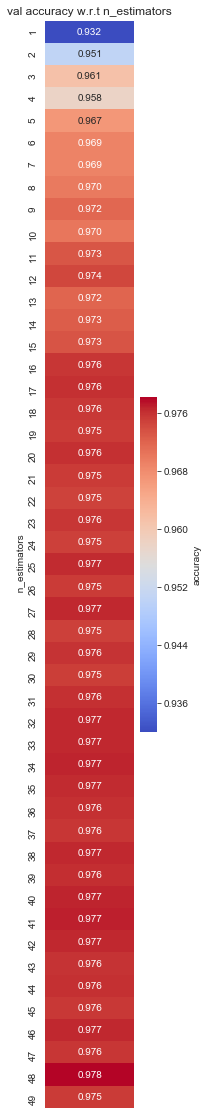

Best n_estimators: 48
Test Accuracy: 0.9712121212121212

Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      1141
          1       0.95      0.83      0.89       179

avg / total       0.97      0.97      0.97      1320



------ Trial#2 ------


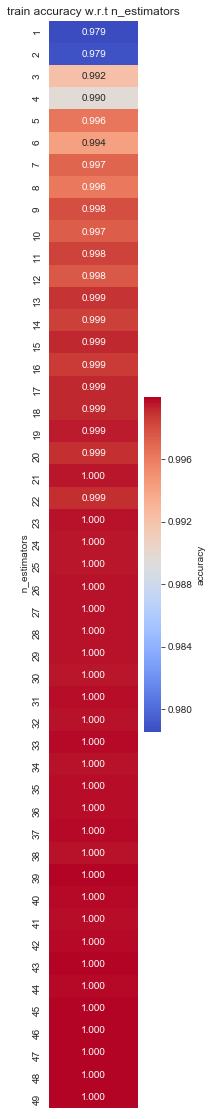

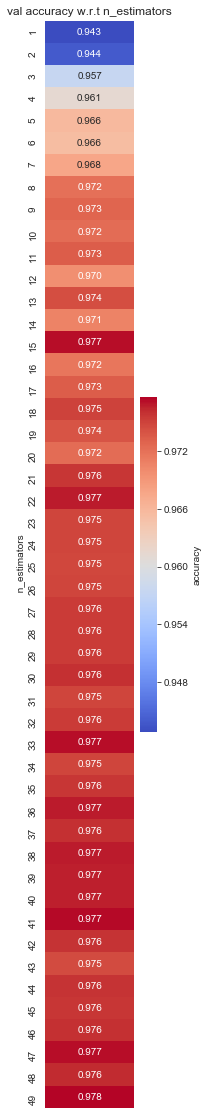

Best n_estimators: 49
Test Accuracy: 0.9742424242424242

Classification Report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      1141
          1       0.97      0.83      0.90       179

avg / total       0.97      0.97      0.97      1320



------ Trial#3 ------


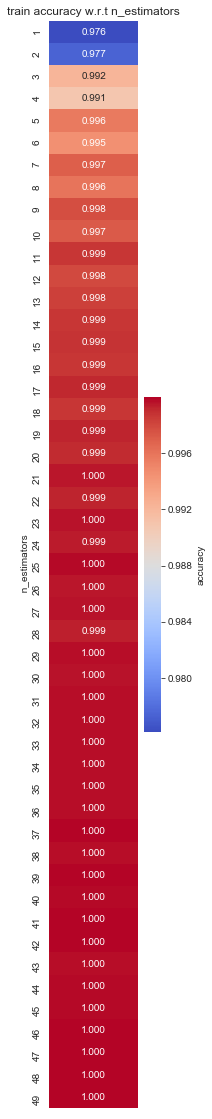

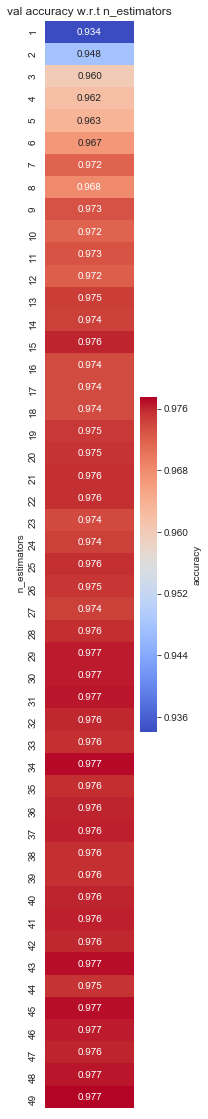

Best n_estimators: 49
Test Accuracy: 0.9742424242424242

Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1141
          1       0.96      0.84      0.90       179

avg / total       0.97      0.97      0.97      1320



Average Test Accuracy: 0.9732323232323231


In [61]:
RF(features_train, features_test, target_train, target_test)

### Classifier 3:  K-nearest neighbors
#### Spliting DataFrame into Training and Testing Sets --> 20% Training Set , 80% Testing Set. (20/80)

In [62]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.80, random_state=1)

------ Trial#1 ------


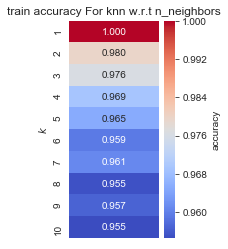

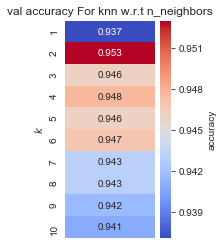

Best n_neighbors: 2
Test Accuracy : 0.9471490812653912

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.97      4467
          1       0.90      0.74      0.81       812

avg / total       0.95      0.95      0.95      5279



------ Trial#2 ------


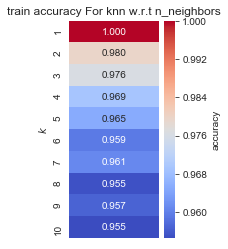

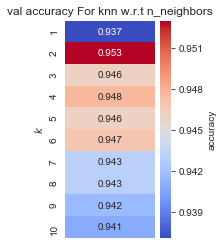

Best n_neighbors: 2
Test Accuracy : 0.9471490812653912

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.97      4467
          1       0.90      0.74      0.81       812

avg / total       0.95      0.95      0.95      5279



------ Trial#3 ------


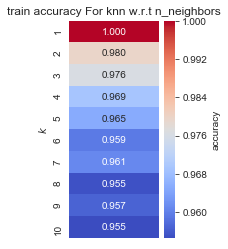

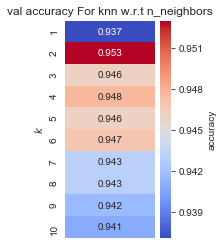

Best n_neighbors: 2
Test Accuracy : 0.9471490812653912

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.97      4467
          1       0.90      0.74      0.81       812

avg / total       0.95      0.95      0.95      5279



Average Test Accuracy: 0.9471490812653912


In [63]:
knn(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets --> 50% Training Set , 50% Testing Set. (50/50)

In [64]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.50, random_state=1)

------ Trial#1 ------


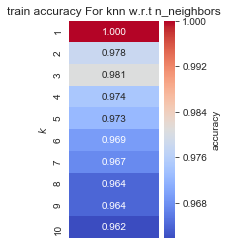

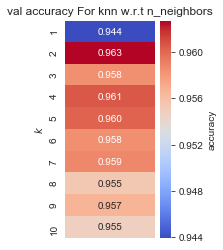

Best n_neighbors: 2
Test Accuracy : 0.9618066080630494

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2789
          1       0.96      0.78      0.86       510

avg / total       0.96      0.96      0.96      3299



------ Trial#2 ------


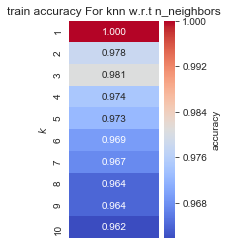

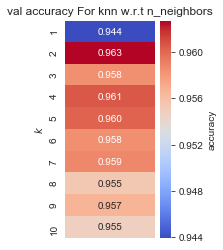

Best n_neighbors: 2
Test Accuracy : 0.9618066080630494

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2789
          1       0.96      0.78      0.86       510

avg / total       0.96      0.96      0.96      3299



------ Trial#3 ------


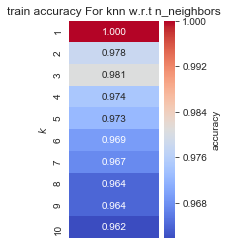

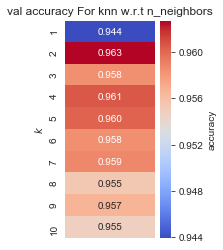

Best n_neighbors: 2
Test Accuracy : 0.9618066080630494

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2789
          1       0.96      0.78      0.86       510

avg / total       0.96      0.96      0.96      3299



Average Test Accuracy: 0.9618066080630494


In [65]:
knn(features_train, features_test, target_train, target_test)

#### Spliting DataFrame into Training and Testing Sets --> 80% Training Set , 20% Testing Set. (80/20)

In [66]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

------ Trial#1 ------


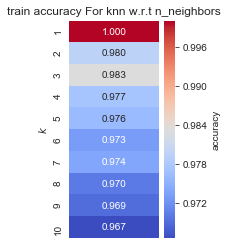

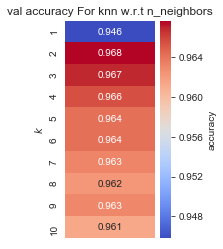

Best n_neighbors: 2
Test Accuracy : 0.9681818181818181

Classification Report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1141
          1       0.98      0.78      0.87       179

avg / total       0.97      0.97      0.97      1320



------ Trial#2 ------


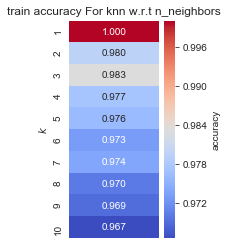

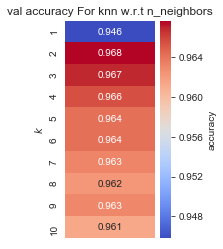

Best n_neighbors: 2
Test Accuracy : 0.9681818181818181

Classification Report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1141
          1       0.98      0.78      0.87       179

avg / total       0.97      0.97      0.97      1320



------ Trial#3 ------


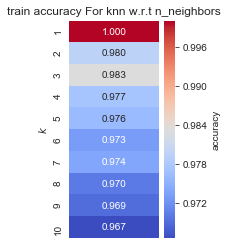

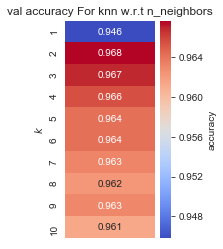

Best n_neighbors: 2
Test Accuracy : 0.9681818181818181

Classification Report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1141
          1       0.98      0.78      0.87       179

avg / total       0.97      0.97      0.97      1320



Average Test Accuracy: 0.9681818181818181


In [67]:
knn(features_train, features_test, target_train, target_test)